In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy.stats import pearsonr

In [64]:
#read queries into dataframe
TOTAL_avg = pd.read_csv('sql_queries/Total_avg_total_pop.csv')
IC_avg = pd.read_csv('sql_queries/interior_columbia_avg.csv')
OC_avg = pd.read_csv('sql_queries/oregon_coast_avg.csv')
WM_avg = pd.read_csv('sql_queries/Willmette_avg.csv')
TOTAL_hot = pd.read_csv('sql_queries/total_hot_days.csv')
IC_hot = pd.read_csv('sql_queries/interior_columbia_hot_days.csv')
OC_hot = pd.read_csv('sql_queries/oregon_coast_hot_days.csv')
WM_hot = pd.read_csv('sql_queries/willimette_hot_days.csv')
OS_avg = pd.read_csv('sql_queries/offset.csv')
SF_avg = pd.read_csv('sql_queries/Spring_fall.csv')


## Total Average Data for combined regions

Text(0.55, 0.9, 'Y = 41543.65980275321x + -28869.342554242954')

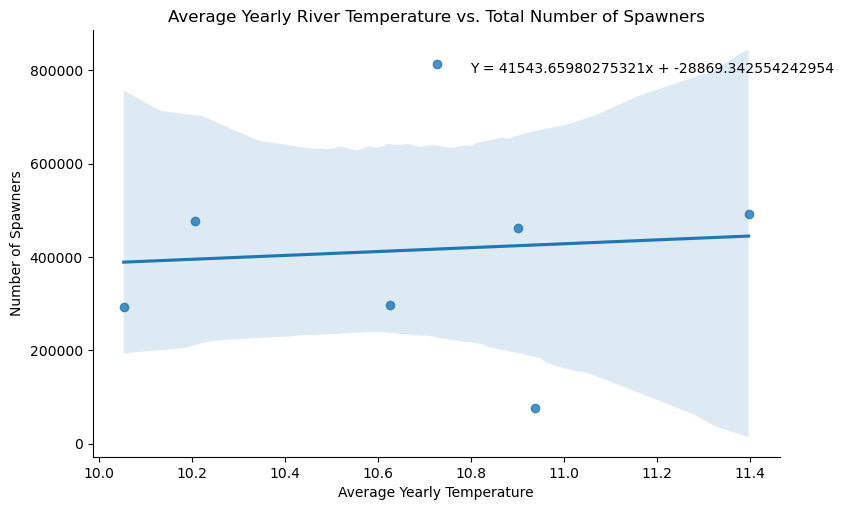

In [46]:
#create scatter plot using SEABORN
sns.lmplot(x='avg_daily_temperatures',y='total_spawners',data=TOTAL_avg,fit_reg=True, height= 5, aspect=1.6)
plt.title("Average Yearly River Temperature vs. Total Number of Spawners")
plt.xlabel("Average Yearly Temperature")
plt.ylabel("Number of Spawners")
m, b = np.polyfit(TOTAL_avg.avg_daily_temperatures, TOTAL_avg.total_spawners, 1)
slope = "Y = " + str(m) + "x + " + str(b)
plt.annotate(slope, xy=(0.55, 0.90), xycoords='axes fraction')


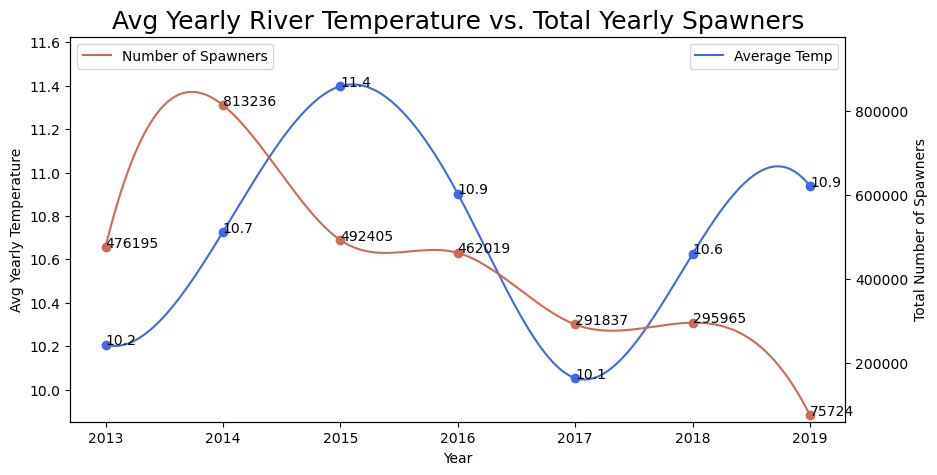

In [5]:
#Create an interpolated smooth line for both axes
x_TOTAL_temp = np.linspace(TOTAL_avg.year.min(), TOTAL_avg.year.max(), 300)
spl = make_interp_spline(TOTAL_avg.year, TOTAL_avg.avg_daily_temperatures, k=3)
y_TOTAL_temp = spl(x_TOTAL_temp)

x_TOTAL_pop = np.linspace(TOTAL_avg.year.min(), TOTAL_avg.year.max(), 300)
spl = make_interp_spline(TOTAL_avg.year, TOTAL_avg.total_spawners, k=3)
y_TOTAL_pop = spl(x_TOTAL_pop)




#Create the figure
fig=plt.figure(figsize=(10,5))
ax1=plt.subplot(1,1,1)
ax1.plot(x_TOTAL_temp, y_TOTAL_temp, label='Average Temp', color='royalblue')
ax1.set_ylim(TOTAL_avg.avg_daily_temperatures.min()*.98,TOTAL_avg.avg_daily_temperatures.max()*1.02)
plt.title('Avg Yearly River Temperature vs. Total Yearly Spawners', fontsize=18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Yearly Temperature')
ax1.legend(loc="upper right")



#Create the dual axis
ax2=ax1.twinx()
ax2.plot(x_TOTAL_pop, y_TOTAL_pop, color='#CA6C57', label='Number of Spawners')
ax2.set_ylim(TOTAL_avg.total_spawners.min()*0.8,TOTAL_avg.total_spawners.max()*1.2)
ax2.legend(loc="upper left")
ax2.set_ylabel('Total Number of Spawners')



#Annotate graph with values
ax1.scatter(TOTAL_avg.year,TOTAL_avg.avg_daily_temperatures, color='royalblue')
for i, row in TOTAL_avg.iterrows():
    ax1.annotate(f'{row["avg_daily_temperatures"]:.1f}', (row['year'], row['avg_daily_temperatures']))

ax2.scatter(TOTAL_avg.year,TOTAL_avg.total_spawners, color='#CA6C57')
for i, row in TOTAL_avg.iterrows():
    ax2.annotate(f'{row["total_spawners"]:.0f}', (row['year'], row['total_spawners']))



In [6]:
TOTAL_avg

,year,avg_daily_temperatures,total_spawners
0,2013,10.206599,476195
1,2014,10.726293,813236
2,2015,11.397604,492405
3,2016,10.902320,462019
4,2017,10.053075,291837
5,2018,10.625373,295965
6,2019,10.936895,75724


In [7]:
# Calculate Pearson correlation coefficient
correlation_matrix = TOTAL_avg.corr()
x = TOTAL_avg['avg_daily_temperatures']
y = TOTAL_avg['total_spawners']
correlation_coefficient, p_value = pearsonr(x, y)
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.08280980077674675
P-value: 0.8598992386392972


## Avg Yearly Temp vs Spawners for the Interior Columbia region

Text(0.55, 0.9, 'Y = 114617.44233125998x + -1083356.6538343094')

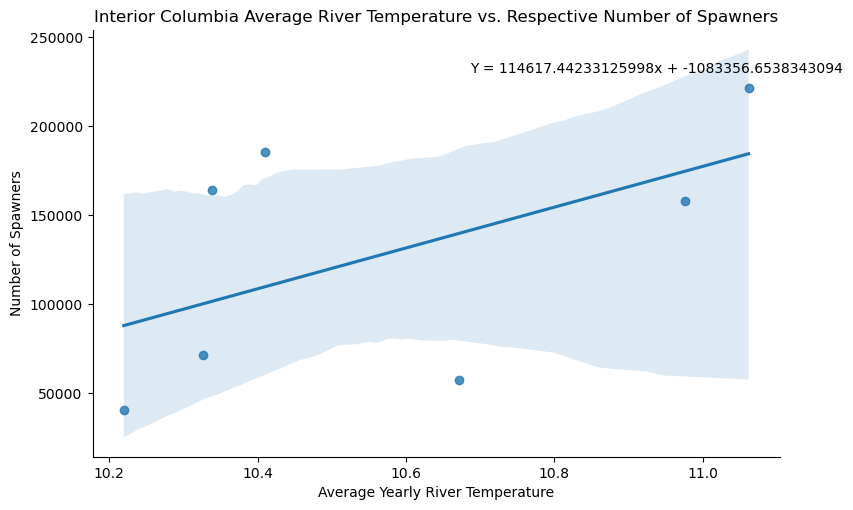

In [8]:
#create scatter plot using SEABORN
sns.lmplot(x='avg_daily_temperatures',y='total_spawners',data=IC_avg,fit_reg=True, height= 5, aspect=1.6)
plt.title("Interior Columbia Average River Temperature vs. Respective Number of Spawners")
plt.xlabel("Average Yearly River Temperature")
plt.ylabel("Number of Spawners")
m, b = np.polyfit(IC_avg.avg_daily_temperatures, IC_avg.total_spawners, 1)
slope = "Y = " + str(m) + "x + " + str(b)
plt.annotate(slope, xy=(0.55, 0.90), xycoords='axes fraction')

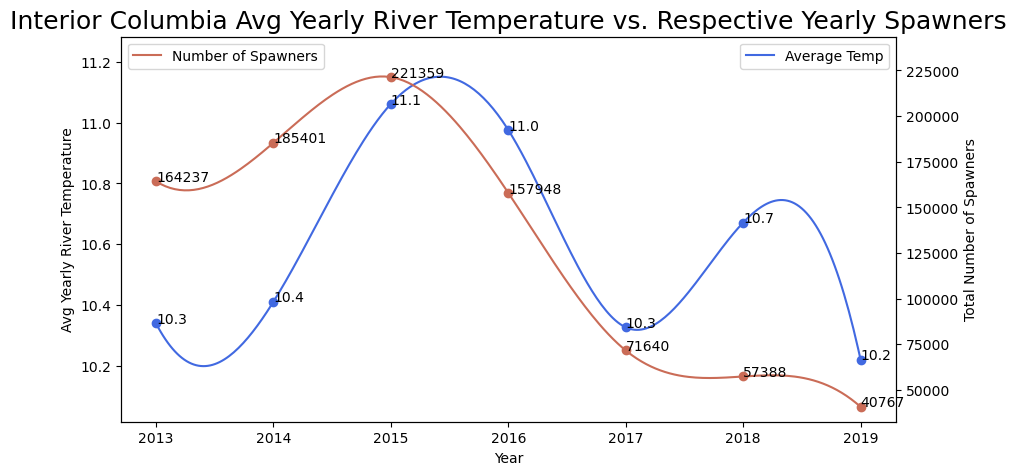

In [9]:
#Create an interpolated smooth line for both axes
x_IC_temp = np.linspace(IC_avg.year.min(), IC_avg.year.max(), 300)
spl = make_interp_spline(IC_avg.year, IC_avg.avg_daily_temperatures, k=3)
y_IC_temp = spl(x_IC_temp)

x_IC_pop = np.linspace(IC_avg.year.min(), IC_avg.year.max(), 300)
spl = make_interp_spline(IC_avg.year, IC_avg.total_spawners, k=3)
y_IC_pop = spl(x_IC_pop)



#Create the figure
fig=plt.figure(figsize=(10,5))
ax1=plt.subplot(1,1,1)
ax1.plot(x_IC_temp, y_IC_temp, label='Average Temp', color='royalblue')
ax1.set_ylim(IC_avg.avg_daily_temperatures.min()*.98, IC_avg.avg_daily_temperatures.max()*1.02)
plt.title('Interior Columbia Avg Yearly River Temperature vs. Respective Yearly Spawners', fontsize=18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Yearly River Temperature')
ax1.legend(loc="upper right")


#Create the dual axis
ax2=ax1.twinx()
ax2.plot(x_IC_pop, y_IC_pop, color='#CA6C57', label='Number of Spawners')
ax2.set_ylim(IC_avg.total_spawners.min()*0.8,IC_avg.total_spawners.max()*1.1)
ax2.legend(loc="upper left")
ax2.set_ylabel('Total Number of Spawners')



#Annotate graph with values
ax1.scatter(IC_avg.year,IC_avg.avg_daily_temperatures, color='royalblue')
for i, row in IC_avg.iterrows():
    ax1.annotate(f'{row["avg_daily_temperatures"]:.1f}', (row['year'], row['avg_daily_temperatures']))

ax2.scatter(IC_avg.year,IC_avg.total_spawners, color='#CA6C57')
for i, row in IC_avg.iterrows():
    ax2.annotate(f'{row["total_spawners"]:.0f}', (row['year'], row['total_spawners']))


In [10]:
IC_avg

,region,year,avg_daily_temperatures,total_spawners
0,Interior Columbia,2013,10.338884,164237
1,Interior Columbia,2014,10.410685,185401
2,Interior Columbia,2015,11.062088,221359
3,Interior Columbia,2016,10.976085,157948
4,Interior Columbia,2017,10.326210,71640
5,Interior Columbia,2018,10.671142,57388
6,Interior Columbia,2019,10.219669,40767


In [11]:
#Drop text Column
IC_stats = IC_avg.drop(columns=['region'])

# Calculate Pearson correlation coefficient
correlation_matrix = IC_stats.corr()
x = IC_stats['avg_daily_temperatures']
y = IC_stats['total_spawners']
correlation_coefficient, p_value = pearsonr(x, y)
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.5450460001045009
P-value: 0.20578018497841896


## Avg Yearly Temp vs Spawners for the Oregon Coast region

Text(0.55, 0.9, 'Y = 66710.92603410859x + -491063.87086919707')

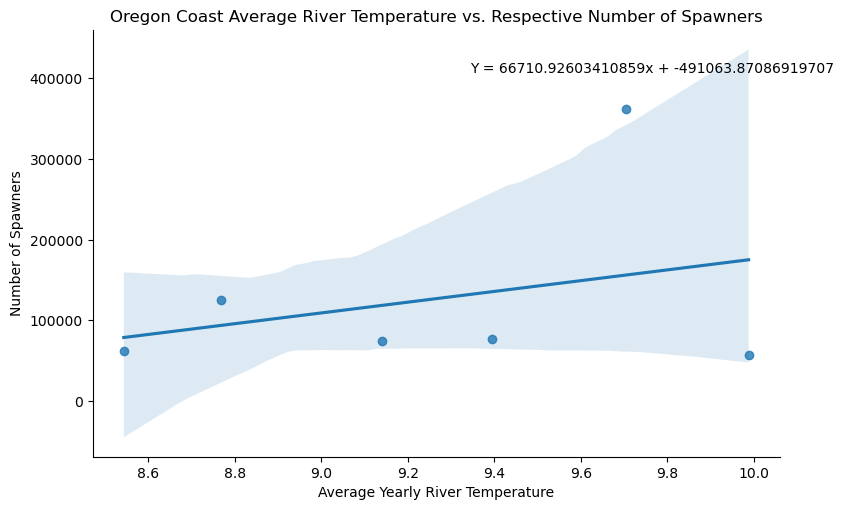

In [12]:
#create scatter plot using SEABORN
sns.lmplot(x='avg_daily_temperatures',y='total_spawners',data=OC_avg,fit_reg=True, height= 5, aspect=1.6)
plt.title("Oregon Coast Average River Temperature vs. Respective Number of Spawners")
plt.xlabel("Average Yearly River Temperature")
plt.ylabel("Number of Spawners")
m, b = np.polyfit(OC_avg.avg_daily_temperatures, OC_avg.total_spawners, 1)
slope = "Y = " + str(m) + "x + " + str(b)
plt.annotate(slope, xy=(0.55, 0.90), xycoords='axes fraction')

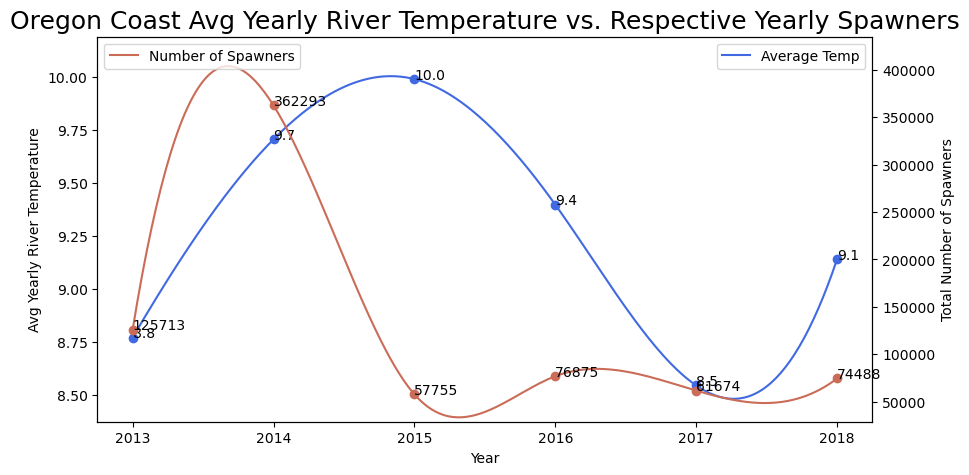

In [13]:
#Create an interpolated smooth line for both axes
x_OC_temp = np.linspace(OC_avg.year.min(), OC_avg.year.max(), 300)
spl = make_interp_spline(OC_avg.year, OC_avg.avg_daily_temperatures, k=3)
y_OC_temp = spl(x_OC_temp)

x_OC_pop = np.linspace(OC_avg.year.min(), OC_avg.year.max(), 300)
spl = make_interp_spline(OC_avg.year, OC_avg.total_spawners, k=3)
y_OC_pop = spl(x_OC_pop)



#Create the figure
fig=plt.figure(figsize=(10,5))
ax1=plt.subplot(1,1,1)
ax1.plot(x_OC_temp, y_OC_temp, label='Average Temp', color='royalblue')
ax1.set_ylim(OC_avg.avg_daily_temperatures.min()*.98, OC_avg.avg_daily_temperatures.max()*1.02)
plt.title('Oregon Coast Avg Yearly River Temperature vs. Respective Yearly Spawners', fontsize=18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Yearly River Temperature')
ax1.legend(loc="upper right")



#Create the dual axis
ax2=ax1.twinx()
ax2.plot(x_OC_pop, y_OC_pop, color='#CA6C57', label='Number of Spawners')
ax2.set_ylim(OC_avg.total_spawners.min()*0.5,OC_avg.total_spawners.max()*1.2)
ax2.legend(loc="upper left")
ax2.set_ylabel('Total Number of Spawners')



#Annotate graph with values
ax1.scatter(OC_avg.year,OC_avg.avg_daily_temperatures, color='royalblue')
for i, row in OC_avg.iterrows():
    ax1.annotate(f'{row["avg_daily_temperatures"]:.1f}', (row['year'], row['avg_daily_temperatures']))

ax2.scatter(OC_avg.year,OC_avg.total_spawners, color='#CA6C57')
for i, row in OC_avg.iterrows():
    ax2.annotate(f'{row["total_spawners"]:.0f}', (row['year'], row['total_spawners']))

In [14]:
OC_avg

,region,year,avg_daily_temperatures,total_spawners
0,Oregon Coast,2013,8.769315,125713
1,Oregon Coast,2014,9.704085,362293
2,Oregon Coast,2015,9.987983,57755
3,Oregon Coast,2016,9.395902,76875
4,Oregon Coast,2017,8.543699,61674
5,Oregon Coast,2018,9.139862,74488


In [15]:
#Drop text Column
OC_stats = OC_avg.drop(columns=['region'])

# Calculate Pearson correlation coefficient
correlation_matrix = OC_stats.corr()
x = OC_stats['avg_daily_temperatures']
y = OC_stats['total_spawners']
correlation_coefficient, p_value = pearsonr(x, y)
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.3109139967007145
P-value: 0.5486566464114435


## Avg Yearly Temp vs Spawners for the Willimette region

Text(0.55, 0.9, 'Y = 52759.04156709288x + -455026.56917346414')

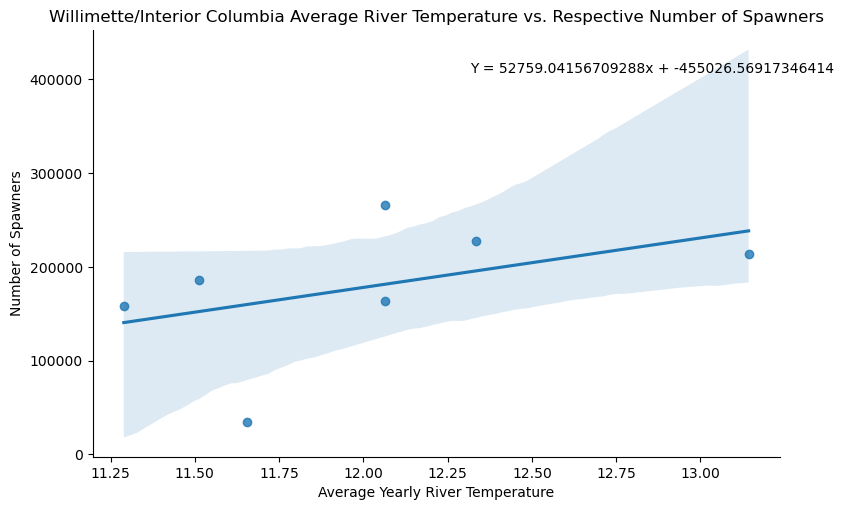

In [16]:
#create scatter plot using SEABORN
sns.lmplot(x='avg_daily_temperatures',y='total_spawners',data=WM_avg,fit_reg=True, height= 5, aspect=1.6)
plt.title("Willimette/Interior Columbia Average River Temperature vs. Respective Number of Spawners")
plt.xlabel("Average Yearly River Temperature")
plt.ylabel("Number of Spawners")
m, b = np.polyfit(WM_avg.avg_daily_temperatures, WM_avg.total_spawners, 1)
slope = "Y = " + str(m) + "x + " + str(b)
plt.annotate(slope, xy=(0.55, 0.90), xycoords='axes fraction')

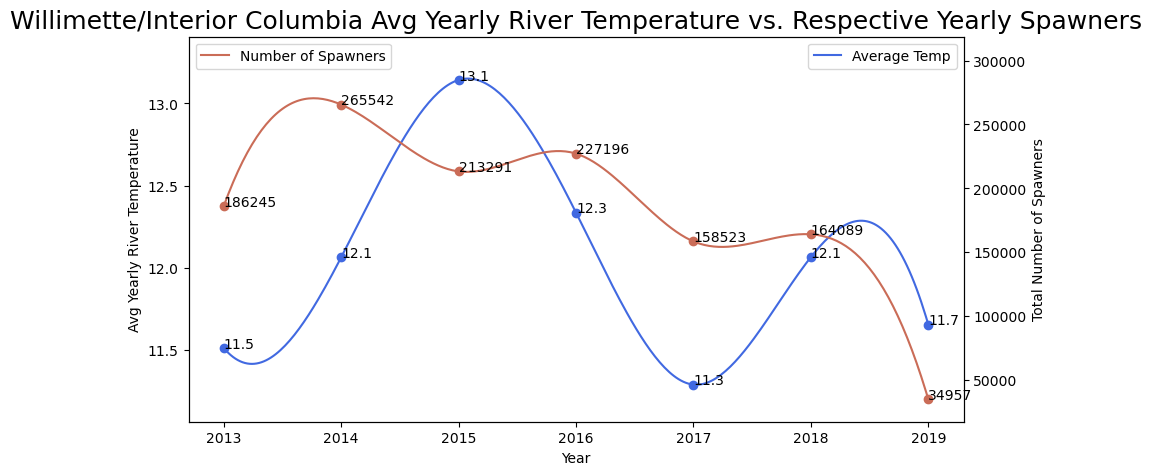

In [17]:
#Create an interpolated smooth line for both y-axis'
x_WM_temp = np.linspace(WM_avg.year.min(), WM_avg.year.max(), 300)
spl = make_interp_spline(WM_avg.year, WM_avg.avg_daily_temperatures, k=3)
y_WM_temp = spl(x_WM_temp)

x_WM_pop = np.linspace(WM_avg.year.min(), WM_avg.year.max(), 300)
spl = make_interp_spline(WM_avg.year, WM_avg.total_spawners, k=3)
y_WM_pop = spl(x_WM_pop)



#Create the figure
fig=plt.figure(figsize=(10,5))
ax1=plt.subplot(1,1,1)
ax1.plot(x_WM_temp, y_WM_temp, label='Average Temp', color='royalblue')
ax1.set_ylim(WM_avg.avg_daily_temperatures.min()*.98, WM_avg.avg_daily_temperatures.max()*1.02)
plt.title('Willimette/Interior Columbia Avg Yearly River Temperature vs. Respective Yearly Spawners', fontsize=18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Yearly River Temperature')
ax1.legend(loc="upper right")



#Create the dual axis
ax2=ax1.twinx()
ax2.plot(x_WM_pop, y_WM_pop, color='#CA6C57', label='Number of Spawners')
ax2.set_ylim(WM_avg.total_spawners.min()*0.5,WM_avg.total_spawners.max()*1.2)
ax2.legend(loc="upper left")
ax2.set_ylabel('Total Number of Spawners')



#Annotate graph with values
ax1.scatter(WM_avg.year,WM_avg.avg_daily_temperatures, color='royalblue')
for i, row in WM_avg.iterrows():
    ax1.annotate(f'{row["avg_daily_temperatures"]:.1f}', (row['year'], row['avg_daily_temperatures']))

ax2.scatter(WM_avg.year,WM_avg.total_spawners, color='#CA6C57')
for i, row in WM_avg.iterrows():
    ax2.annotate(f'{row["total_spawners"]:.0f}', (row['year'], row['total_spawners']))

In [18]:
WM_avg

,region,year,avg_daily_temperatures,total_spawners
0,Willamette/Lower Columbia,2013,11.511598,186245
1,Willamette/Lower Columbia,2014,12.064110,265542
2,Willamette/Lower Columbia,2015,13.142740,213291
3,Willamette/Lower Columbia,2016,12.334973,227196
4,Willamette/Lower Columbia,2017,11.289315,158523
5,Willamette/Lower Columbia,2018,12.065114,164089
6,Willamette/Lower Columbia,2019,11.654121,34957


In [19]:
#Drop text Column
WM_stats = WM_avg.drop(columns=['region'])

# Calculate Pearson correlation coefficient
correlation_matrix = WM_stats.corr()
x = WM_stats['avg_daily_temperatures']
y = WM_stats['total_spawners']
correlation_coefficient, p_value = pearsonr(x, y)
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.4432620739305382
P-value: 0.3191885841248843


## Total Number of Hot Days (Days with an Average Temp Over 14.9 C) per Year In All Regions VS Total Yearly Salmon Population

Text(0.55, 0.9, 'Y = 1499.8411887666994x + -561699.260110878')

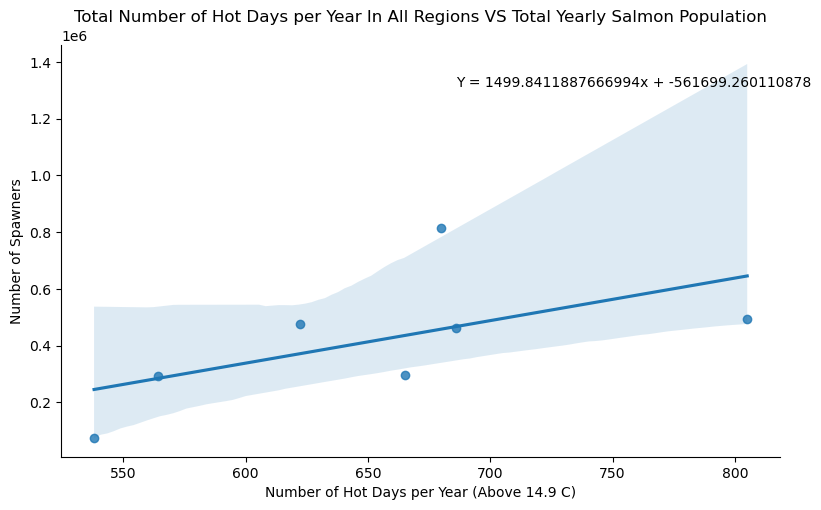

In [49]:
#create scatter plot using SEABORN
sns.lmplot(x='hot_days',y='total_spawners',data=TOTAL_hot,fit_reg=True,height= 5,aspect=1.6)
plt.title("Total Number of Hot Days per Year In All Regions VS Total Yearly Salmon Population")
plt.xlabel("Number of Hot Days per Year (Above 14.9 C)")
plt.ylabel("Number of Spawners")
m, b = np.polyfit(TOTAL_hot.hot_days, TOTAL_hot.total_spawners, 1)
slope = "Y = " + str(m) + "x + " + str(b)
plt.annotate(slope, xy=(0.55, 0.90), xycoords='axes fraction')

In [44]:
TOTAL_hot

,year,hot_days,total_spawners
0,2013,622,476195
1,2014,680,813236
2,2015,805,492405
3,2016,686,462019
4,2017,564,291837
5,2018,665,295965
6,2019,538,75724


In [45]:
# Calculate Pearson correlation coefficient
correlation_matrix = TOTAL_hot.corr()
x = TOTAL_hot['hot_days']
y = TOTAL_hot['total_spawners']
correlation_coefficient, p_value = pearsonr(x, y)
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.580320036427735
P-value: 0.1719540927915861


## Total Number of Hot Days (Days with an Average Temp Over 14.9 C) per Year Interior Columbia VS Respective Yearly Salmon Population

Text(0.55, 0.9, 'Y = 1698.4287690179847x + -350565.4842916432')

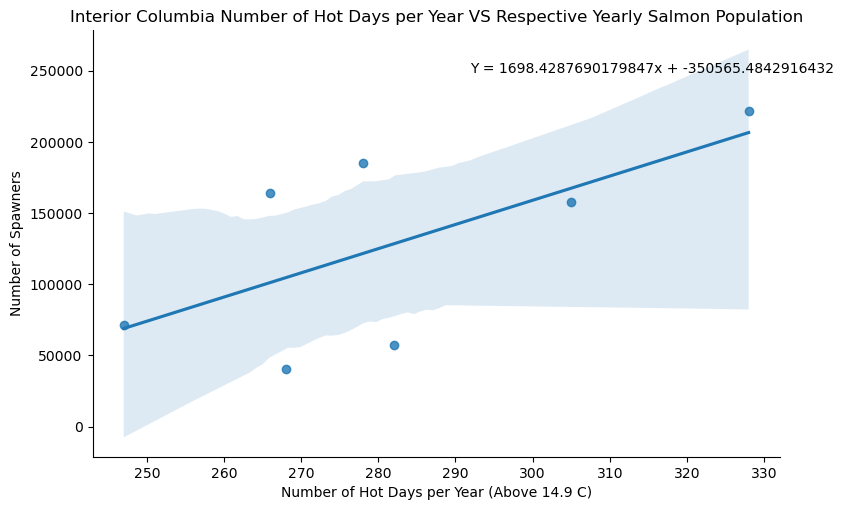

In [52]:
#create scatter plot using SEABORN
sns.lmplot(x='hot_days',y='total_spawners',data=IC_hot,fit_reg=True, height= 5, aspect=1.6)
plt.title("Interior Columbia Number of Hot Days per Year VS Respective Yearly Salmon Population")
plt.xlabel("Number of Hot Days per Year (Above 14.9 C)")
plt.ylabel("Number of Spawners")
m, b = np.polyfit(IC_hot.hot_days, IC_hot.total_spawners, 1)
slope = "Y = " + str(m) + "x + " + str(b)
plt.annotate(slope, xy=(0.55, 0.90), xycoords='axes fraction')

In [53]:
IC_hot

,region,year,hot_days,total_spawners
0,Interior Columbia,2013,266,164237
1,Interior Columbia,2014,278,185401
2,Interior Columbia,2015,328,221359
3,Interior Columbia,2016,305,157948
4,Interior Columbia,2017,247,71640
5,Interior Columbia,2018,282,57388
6,Interior Columbia,2019,268,40767


In [54]:
#Drop text Column
IC_hot_stats = IC_hot.drop(columns=['region'])

# Calculate Pearson correlation coefficient
correlation_matrix = IC_hot_stats.corr()
x = IC_hot_stats['hot_days']
y = IC_hot_stats['total_spawners']
correlation_coefficient, p_value = pearsonr(x, y)
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.6459379254893043
P-value: 0.11705371374777573


## Total Number of Hot Days (Days with an Average Temp Over 14.9 C) per Year Oregon Coast VS Respective Yearly Salmon Population

Text(0.55, 0.9, 'Y = -241.60443680674877x + 145512.81643493203')

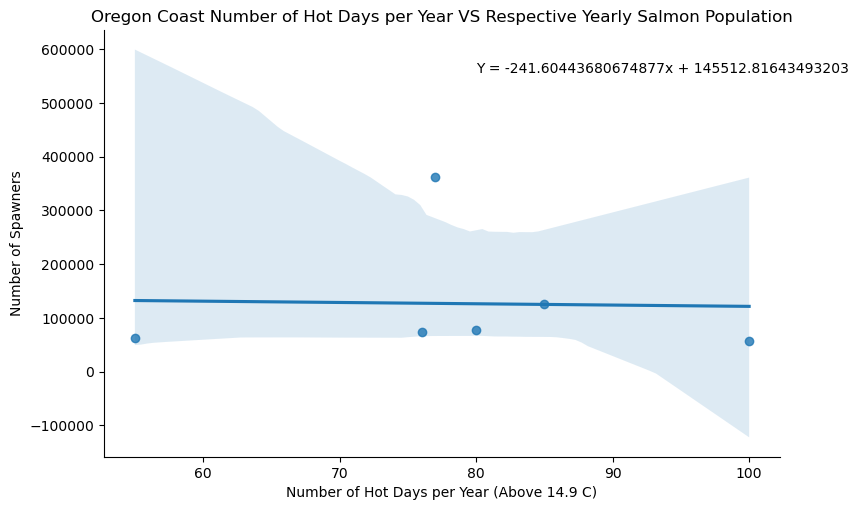

In [60]:
#create scatter plot using SEABORN
sns.lmplot(x='hot_days',y='total_spawners',data=OC_hot,fit_reg=True, height= 5, aspect=1.6)
plt.title("Oregon Coast Number of Hot Days per Year VS Respective Yearly Salmon Population")
plt.xlabel("Number of Hot Days per Year (Above 14.9 C)")
plt.ylabel("Number of Spawners")
m, b = np.polyfit(OC_hot.hot_days, OC_hot.total_spawners, 1)
slope = "Y = " + str(m) + "x + " + str(b)
plt.annotate(slope, xy=(0.55, 0.90), xycoords='axes fraction')

In [56]:
OC_hot

,region,year,hot_days,total_spawners
0,Oregon Coast,2013,85,125713
1,Oregon Coast,2014,77,362293
2,Oregon Coast,2015,100,57755
3,Oregon Coast,2016,80,76875
4,Oregon Coast,2017,55,61674
5,Oregon Coast,2018,76,74488


In [59]:
#Drop text Column
OC_hot_stats = OC_hot.drop(columns=['region'])

# Calculate Pearson correlation coefficient
correlation_matrix = OC_hot_stats.corr()
x = OC_hot_stats['hot_days']
y = OC_hot_stats['total_spawners']
correlation_coefficient, p_value = pearsonr(x, y)
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: -0.029891794753428576
P-value: 0.9551756623190177


## Willimette/Interior Columbia Total Number of Hot Days (Days with an Average Temp Over 14.9 C) per Year VS Respective Yearly Salmon Population

Text(0.55, 0.9, 'Y = 987.5157269508711x + -119539.67586388432')

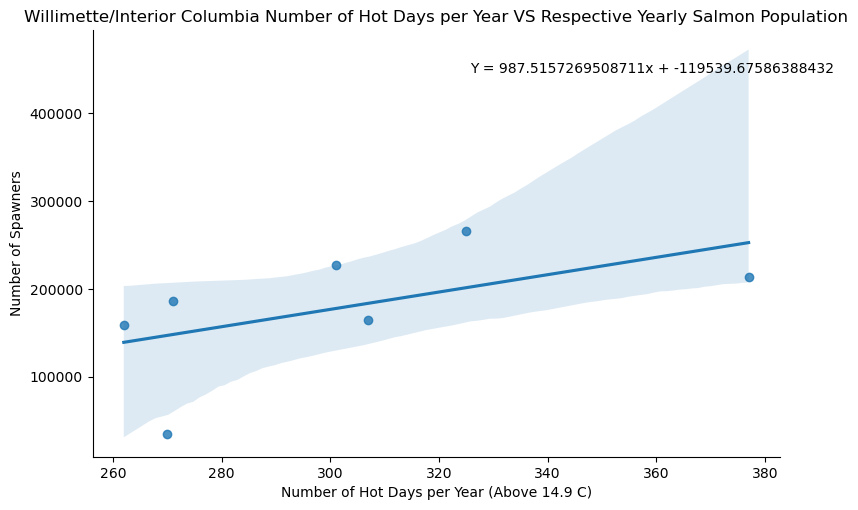

In [61]:
#create scatter plot using SEABORN
sns.lmplot(x='hot_days',y='total_spawners',data=WM_hot,fit_reg=True, height= 5, aspect=1.6)
plt.title("Willimette/Interior Columbia Number of Hot Days per Year VS Respective Yearly Salmon Population")
plt.xlabel("Number of Hot Days per Year (Above 14.9 C)")
plt.ylabel("Number of Spawners")
m, b = np.polyfit(WM_hot.hot_days, WM_hot.total_spawners, 1)
slope = "Y = " + str(m) + "x + " + str(b)
plt.annotate(slope, xy=(0.55, 0.90), xycoords='axes fraction')

In [62]:
WM_hot

,region,year,hot_days,total_spawners
0,Willamette/Lower Columbia,2013,271,186245
1,Willamette/Lower Columbia,2014,325,265542
2,Willamette/Lower Columbia,2015,377,213291
3,Willamette/Lower Columbia,2016,301,227196
4,Willamette/Lower Columbia,2017,262,158523
5,Willamette/Lower Columbia,2018,307,164089
6,Willamette/Lower Columbia,2019,270,34957


In [63]:
#Drop text Column
WM_hot_stats = WM_hot.drop(columns=['region'])

# Calculate Pearson correlation coefficient
correlation_matrix = WM_hot_stats.corr()
x = WM_hot_stats['hot_days']
y = WM_hot_stats['total_spawners']
correlation_coefficient, p_value = pearsonr(x, y)
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.5418859576575601
P-value: 0.20895337906868885


## Average Yearly Spring River Temperature vs. Total Number of Fall Run Spawners

Text(0.55, 0.9, 'Y = -18085.61025025009x + 422150.66089703573')

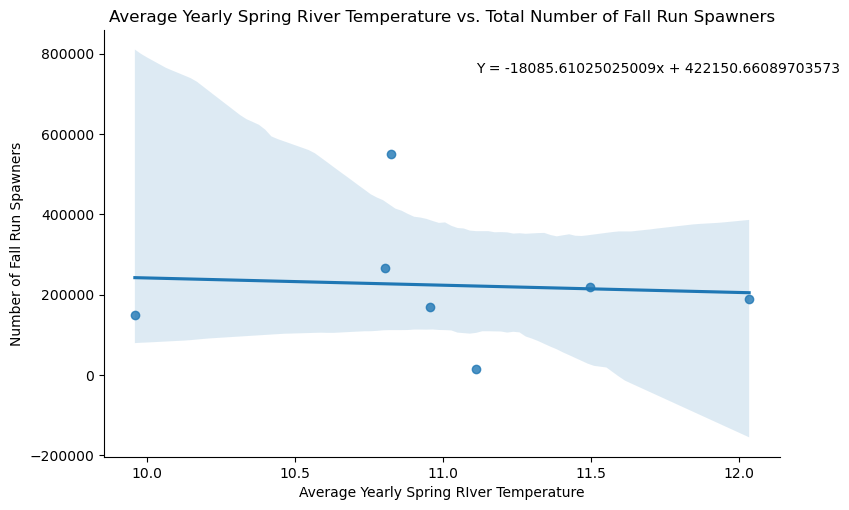

In [78]:
#create scatter plot using SEABORN
sns.lmplot(x='spring_daily_temperatures',y='fall_spawners',data=SF_avg,fit_reg=True, height= 5, aspect=1.6)
plt.title("Average Yearly Spring River Temperature vs. Total Number of Fall Run Spawners")
plt.xlabel("Average Yearly Spring RIver Temperature")
plt.ylabel("Number of Fall Run Spawners")
m, b = np.polyfit(SF_avg.spring_daily_temperatures, SF_avg.fall_spawners, 1)
slope = "Y = " + str(m) + "x + " + str(b)
plt.annotate(slope, xy=(0.55, 0.90), xycoords='axes fraction')

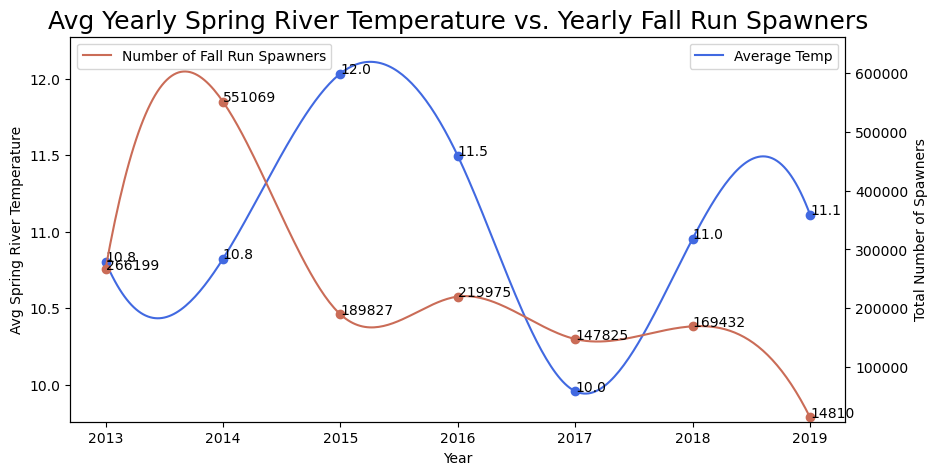

In [77]:
x_SF_temp = np.linspace(SF_avg.year.min(), SF_avg.year.max(), 300)
spl = make_interp_spline(SF_avg.year, SF_avg.spring_daily_temperatures, k=3)
y_SF_temp = spl(x_SF_temp)

x_SF_pop = np.linspace(SF_avg.year.min(), SF_avg.year.max(), 300)
spl = make_interp_spline(SF_avg.year, SF_avg.fall_spawners, k=3)
y_SF_pop = spl(x_SF_pop)



#Create the figure
fig=plt.figure(figsize=(10,5))
ax1=plt.subplot(1,1,1)
ax1.plot(x_SF_temp, y_SF_temp, label='Average Temp', color='royalblue')
ax1.set_ylim(SF_avg.spring_daily_temperatures.min()*.98, SF_avg.spring_daily_temperatures.max()*1.02)
plt.title('Avg Yearly Spring River Temperature vs. Yearly Fall Run Spawners', fontsize=18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Spring River Temperature')
ax1.legend(loc="upper right")



#Create the dual axis
ax2=ax1.twinx()
ax2.plot(x_SF_pop, y_SF_pop, color='#CA6C57', label='Number of Fall Run Spawners')
ax2.set_ylim(SF_avg.fall_spawners.min()*0.5,SF_avg.fall_spawners.max()*1.2)
ax2.legend(loc="upper left")
ax2.set_ylabel('Total Number of Spawners')



#Annotate graph with values
ax1.scatter(SF_avg.year,SF_avg.spring_daily_temperatures, color='royalblue')
for i, row in SF_avg.iterrows():
    ax1.annotate(f'{row["spring_daily_temperatures"]:.1f}', (row['year'], row['spring_daily_temperatures']))

ax2.scatter(SF_avg.year,SF_avg.fall_spawners, color='#CA6C57')
for i, row in SF_avg.iterrows():
    ax2.annotate(f'{row["fall_spawners"]:.0f}', (row['year'], row['fall_spawners']))

In [79]:
SF_avg

,year,spring_daily_temperatures,fall_spawners
0,2013,10.804971,266199
1,2014,10.823392,551069
2,2015,12.033260,189827
3,2016,11.495833,219975
4,2017,9.959137,147825
5,2018,10.955228,169432
6,2019,11.112061,14810


In [80]:
# Calculate Pearson correlation coefficient
correlation_matrix = SF_avg.corr()
x = SF_avg['spring_daily_temperatures']
y = SF_avg['fall_spawners']
correlation_coefficient, p_value = pearsonr(x, y)
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: -0.07060073116180239
P-value: 0.8804429605221896


## Staggered Fall Run spawners by 4 years VS Average Yearly Spring temperature

Text(0.55, 0.9, 'Y = -157690.74753387374x + 2061162.7737773766')

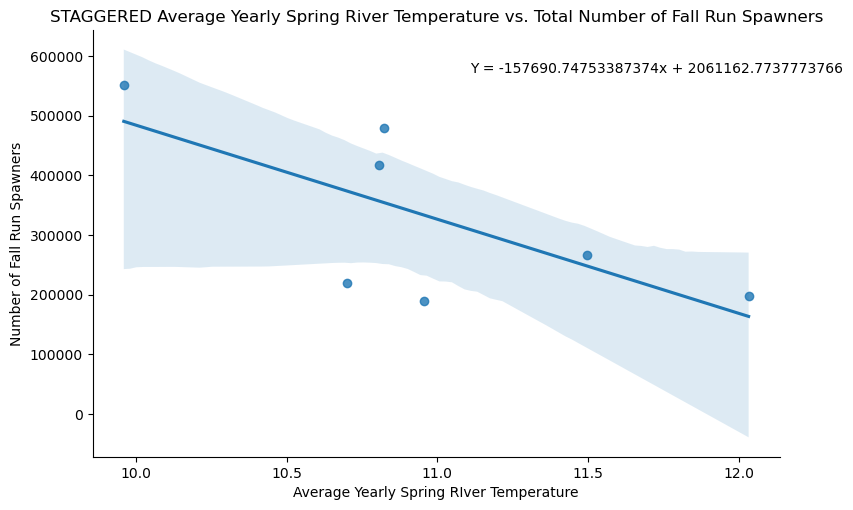

In [82]:
#create scatter plot using SEABORN
sns.lmplot(x='spring_daily_temperatures',y='fall_spawners',data=OS_avg,fit_reg=True, height= 5, aspect=1.6)
plt.title("STAGGERED Average Yearly Spring River Temperature vs. Total Number of Fall Run Spawners")
plt.xlabel("Average Yearly Spring RIver Temperature")
plt.ylabel("Number of Fall Run Spawners")
m, b = np.polyfit(OS_avg.spring_daily_temperatures, OS_avg.fall_spawners, 1)
slope = "Y = " + str(m) + "x + " + str(b)
plt.annotate(slope, xy=(0.55, 0.90), xycoords='axes fraction')

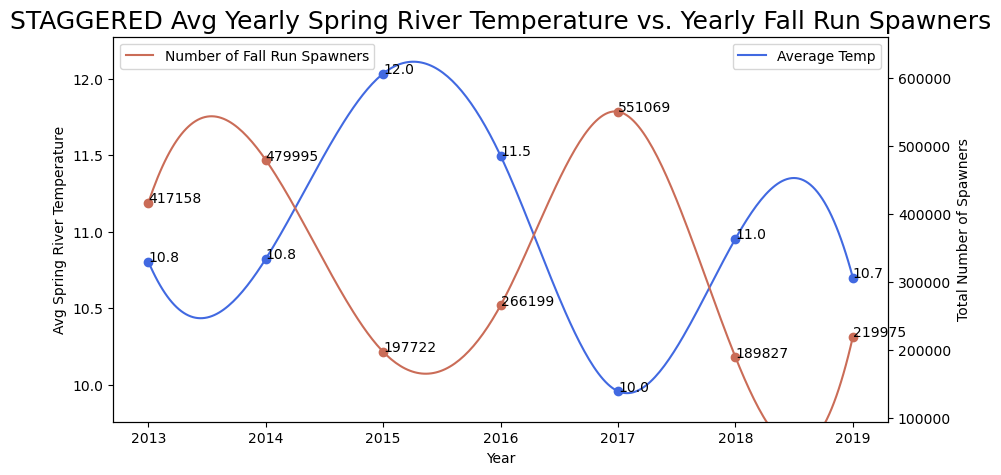

In [83]:
x_OS_temp = np.linspace(OS_avg.year.min(), OS_avg.year.max(), 300)
spl = make_interp_spline(OS_avg.year, OS_avg.spring_daily_temperatures, k=3)
y_OS_temp = spl(x_OS_temp)

x_OS_pop = np.linspace(OS_avg.year.min(), OS_avg.year.max(), 300)
spl = make_interp_spline(OS_avg.year, OS_avg.fall_spawners, k=3)
y_OS_pop = spl(x_OS_pop)



#Create the figure
fig=plt.figure(figsize=(10,5))
ax1=plt.subplot(1,1,1)
ax1.plot(x_OS_temp, y_OS_temp, label='Average Temp', color='royalblue')
ax1.set_ylim(OS_avg.spring_daily_temperatures.min()*.98, OS_avg.spring_daily_temperatures.max()*1.02)
plt.title('STAGGERED Avg Yearly Spring River Temperature vs. Yearly Fall Run Spawners', fontsize=18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Spring River Temperature')
ax1.legend(loc="upper right")



#Create the dual axis
ax2=ax1.twinx()
ax2.plot(x_OS_pop, y_OS_pop, color='#CA6C57', label='Number of Fall Run Spawners')
ax2.set_ylim(OS_avg.fall_spawners.min()*0.5,OS_avg.fall_spawners.max()*1.2)
ax2.legend(loc="upper left")
ax2.set_ylabel('Total Number of Spawners')



#Annotate graph with values
ax1.scatter(OS_avg.year,OS_avg.spring_daily_temperatures, color='royalblue')
for i, row in OS_avg.iterrows():
    ax1.annotate(f'{row["spring_daily_temperatures"]:.1f}', (row['year'], row['spring_daily_temperatures']))

ax2.scatter(OS_avg.year,OS_avg.fall_spawners, color='#CA6C57')
for i, row in OS_avg.iterrows():
    ax2.annotate(f'{row["fall_spawners"]:.0f}', (row['year'], row['fall_spawners']))

In [84]:
OS_avg

,year,spring_daily_temperatures,fall_spawners
0,2013,10.804971,417158
1,2014,10.823392,479995
2,2015,12.033260,197722
3,2016,11.495833,266199
4,2017,9.959137,551069
5,2018,10.955228,189827
6,2019,10.699927,219975


In [85]:
# Calculate Pearson correlation coefficient
correlation_matrix = OS_avg.corr()
x = OS_avg['spring_daily_temperatures']
y = OS_avg['fall_spawners']
correlation_coefficient, p_value = pearsonr(x, y)
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: -0.6924823176077625
P-value: 0.08463685620940146
